In [1]:
# LSTM: 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러개 갖고 있음
# 기본 순환층과 달리 출력은 시그모이드 함수 사용

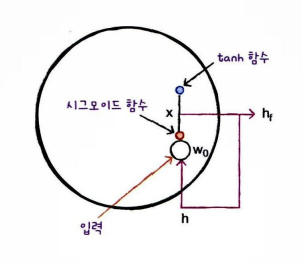

In [2]:
#LSTM은 RNN이 장기간 정보를 기억하지 못 하고 소실되는 문제를 해결하기 위해 고안됨
#장기 기억 통로 - 셀 상태(정보가 순환하면서 전달되는 통로), 마치 컨베이어 벨트퍼럼 중요한 정보는 이 통로를 따라 다음 시점까지 전달됨, 장기적 의존성 학습함
#3가지 주요 게이트를 통해서 셀상태에 들어갈 정보, 나갈 정보, 잊을 정보를 통제함(각 게이트는 시그모이드 함수 사용하여 출력을 0(차단, 잊음)과 1(통과, 기억) 사이로 전달)
#출력 게이트: 새로 갱신된 셀 상태를 tanh 함수로 필터링한 후, 게이트가 결정한 필요한 정보의 양(0, 1)만큼 꺼내어 다음 층으로 전달될 은닉상태를 만듦

In [ ]:
from keras.datasets import imdb    #keras.,.. tensorflow의 공식적 api, 딥러닝 패키지, lmdb 자연어처리(NLP) 분야에서 이진 감성분류 모델 훈련하고 테스트하는데 사용되는 데이터셋
from sklearn.model_selection import train_test_split

In [ ]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

#리뷰 데이터 로드하고 분리하기

In [5]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

In [6]:
from keras.preprocessing.sequence import pad_sequences  #데이터 길이 맞추기

train_seq = pad_sequences(train_input, maxlen = 100)
val_seq = pad_sequences(val_input, maxlen = 100)

In [ ]:
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation = 'sigmoid'))

#simpleRNN 대신 LSTM 클래스 활용

In [8]:
model_lstm.summary()
#LSTM 셀은 4개의 작은 셀(게이트)로 구성되어있고, 각 게이트는 독립적인 가중치와 편향을 학습해야하므로 RNN의 계산량은 4배가 됨

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only = True)
#훈련이 진행되는 동안, 검증 성능이 가장 좋았던(예: 검증 손실이 가장 낮았던) 모델의 가중치를 'best-lstm-model.keras' 파일에 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights = True)
#patience = 3: 검증 손실이 3 에포크 동안 개선되지 않으면 (즉, 3번 연속으로 성능이 나빠지면) 훈련을 중단
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size = 64, 
                         validation_data = (val_seq, val_target), callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6955 - loss: 0.5844 - val_accuracy: 0.7824 - val_loss: 0.4731
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7893 - loss: 0.4571 - val_accuracy: 0.7866 - val_loss: 0.4653
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7957 - loss: 0.4371 - val_accuracy: 0.7850 - val_loss: 0.4543
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8026 - loss: 0.4249 - val_accuracy: 0.8028 - val_loss: 0.4353
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8091 - loss: 0.4143 - val_accuracy: 0.8076 - val_loss: 0.4301
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8094 - loss: 0.4115 - val_accuracy: 0.8050 - val_loss: 0.4282
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8178 - loss: 0.4013 - val_accuracy: 0.8000 - val_loss: 0.4324
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8160 - loss: 0.3973 - 

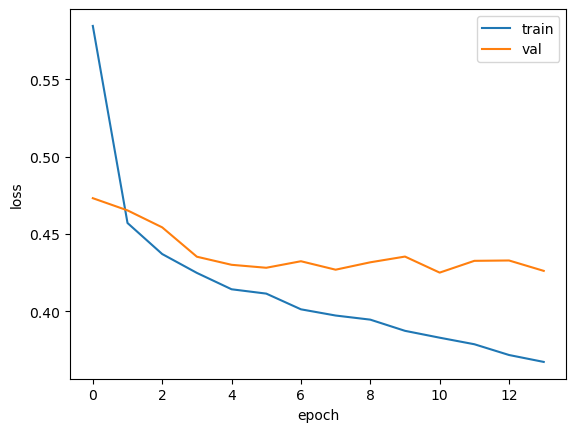

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout = 0.2))
model_dropout.add(keras.layers.Dense(1, activation = 'sigmoid'))

#순환층에 dropout 적용


In [12]:
model_dropout.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model_dropout.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                            validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6714 - loss: 0.6087 - val_accuracy: 0.7728 - val_loss: 0.4987
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7781 - loss: 0.4828 - val_accuracy: 0.7802 - val_loss: 0.4663
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7943 - loss: 0.4474 - val_accuracy: 0.7934 - val_loss: 0.4500
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8028 - loss: 0.4271 - val_accuracy: 0.8002 - val_loss: 0.4351
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8125 - loss: 0.4143 - val_accuracy: 0.8044 - val_loss: 0.4274
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8117 - loss: 0.4119 - val_accuracy: 0.8056 - val_loss: 0.4219
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8153 - loss: 0.4062 - val_accuracy: 0.8064 - val_loss: 0.4238
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8123 - loss: 0.4052 - 

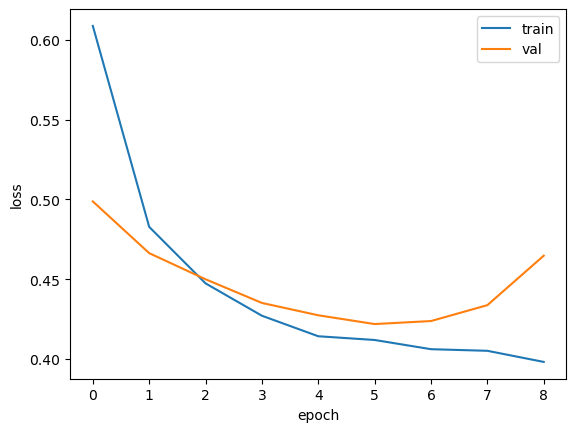

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#드롭아웃으로 train loss는 점점 억제했으나, val loss는 나아지지 않음

In [ ]:
#순환층을 연결할때, 순환층이 쌓이게되면 모든 순환층에 순차 데이터가 필요함. 
#케라스 순환층의 모든 타임스텝ㅈ의 은닉 상태를 출력하려면 마지막 제외 모든 순환층에서 return_sequences 매개변수를 True로 지정해야함

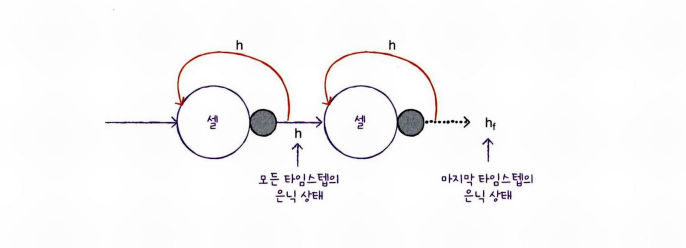

In [ ]:
#2개의 층 연결하기

model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))    #입력층, 입력 시퀀스의 길이 100으로 지정
model_2lstm.add(keras.layers.Embedding(500, 16))     #embedding층, 500개의 단어를 각각 16차원의 벡터로 변환
model_2lstm.add(keras.layers.LSTM(8, dropout = 0.2, return_sequences = True))  #lstm 유닛(뉴런) 개수 8개, 출력: 100개 시퀀스를 각각 8차원의 벡터로 출력
model_2lstm.add(keras.layers.LSTM(8, dropout = 0.2))   #시퀀스 차원(100) 사라지고 요약된 9차원 벡터만 남음
model_2lstm.add(keras.layers.Dense(1, activation= 'sigmoid'))

model_2lstm.summary()


#return_sequences=False (기본값)로 설정되어 있을 때, 입력된 긴 시퀀스(예: 100개의 단어)를 모두 처리한 후 **최종 시점의 은닉 상태(Hidden State)**만을 출력
#LSTM 층의 역할: 시간적 패턴 학습 및 장기기억, 시퀀스 정보 압축(차원 축소),, lstm 입력형태(배치크기, 시퀀스 길이, 임베딩차원), 출력형태(배치크기, 유닛개수)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_2lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model_2lstm.fit(train_seq, train_target, epochs = 100, batch_size = 64, 
                          validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6826 - loss: 0.5915 - val_accuracy: 0.7560 - val_loss: 0.5052
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7706 - loss: 0.4887 - val_accuracy: 0.7552 - val_loss: 0.5091
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7861 - loss: 0.4626 - val_accuracy: 0.7934 - val_loss: 0.4474
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7904 - loss: 0.4461 - val_accuracy: 0.7976 - val_loss: 0.4371
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7974 - loss: 0.4384 - val_accuracy: 0.7814 - val_loss: 0.4694
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7998 - loss: 0.4308 - val_accuracy: 0.8002 - val_loss: 0.4269
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8021 - loss: 0.4288 - val_accuracy: 0.7898 - val_loss: 0.4460
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8084 - loss: 0.4201 

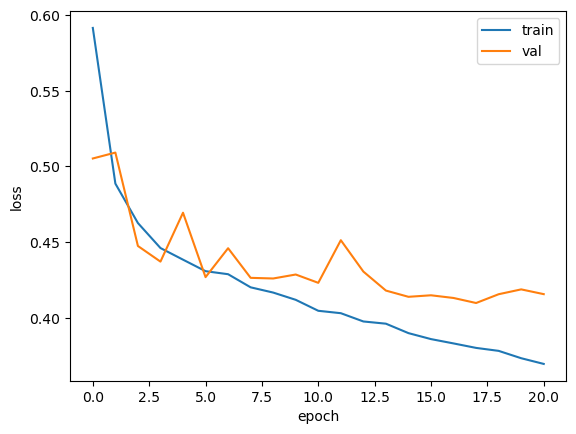

In [19]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#GRU 구조: LSTM을 간소화한 버전
#LSTM처럼 셀 상태를 계산하지 않고 은닉상태 하나만 순환 정보로 사용함
#LSTM은 3개의 게이트를 사용하는 것에 비해 GRU는 두 개의 게이트만 사용함(재설정: 얼마나 잊을지, 업데이트: 얼마나 반영할지)

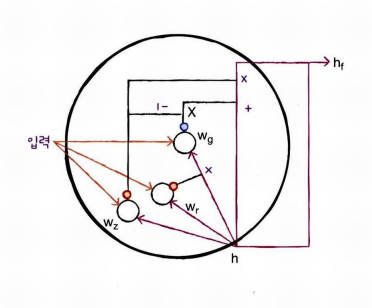

In [20]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout =0.2))
model_gru.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model_gru.summary()
#none 배치크기 가변적

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model_gru.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience =3, restore_best_weights = True)
history = model_gru.fit(train_seq, train_target, epochs = 100, batch_size = 64,
                        validation_data = (val_seq, val_target), callbacks = [checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6413 - loss: 0.6249 - val_accuracy: 0.7552 - val_loss: 0.5060
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7707 - loss: 0.4846 - val_accuracy: 0.7794 - val_loss: 0.4688
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7870 - loss: 0.4601 - val_accuracy: 0.7922 - val_loss: 0.4535
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7972 - loss: 0.4422 - val_accuracy: 0.7878 - val_loss: 0.4576
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8018 - loss: 0.4320 - val_accuracy: 0.8036 - val_loss: 0.4308
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8068 - loss: 0.4233 - val_accuracy: 0.7924 - val_loss: 0.4419
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8075 - loss: 0.4176 - val_accuracy: 0.8064 - val_loss: 0.4233
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8131 - loss: 0.4146 - 

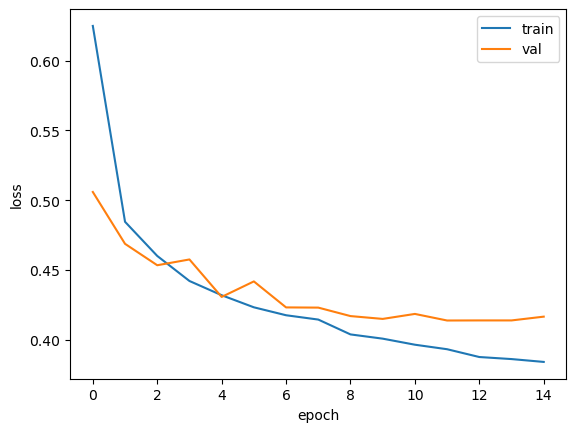

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#보다 더 잘 수렴하고 있음
#lstm이 복잡한 구조로 인해 훈련데이터의 노이즈까지 더 잘 학습하여 과대적합이 더 빨리 발생하여 이로인해 val loss가 더 일찍 상승할 수 있음
#그러나 손실함수의 수렴 정도가 반드시 최종 모델의 성능을 증명하지는 못 함
#GRU가 초기에 더 효과적으로 보인다면 이는 단순성과 빠른 수렴 속도 때문일 가능성이 높으며, 이는 특정 데이터셋에서 GRU를 사용하는 것이 더 합리적일 수 있음을 시사함

In [ ]:
test_seq = pad_sequences(test_input, maxlen = 100)  #테스트 데이터 준비
best_model = keras.models.load_model('best-gru-model.keras')  #최적의 모델 로드
best_model.evaluate(test_seq, test_target)  #모델 평가, 테스트 데이터로 일반화 성능 검증

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8142 - loss: 0.4099


[0.4099089205265045, 0.8142399787902832]